<a href="https://colab.research.google.com/github/marchiorog/projeto_fashion_mnist_api/blob/master/Projeto1Vis%C3%A3oComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 1. Carregando o dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 2. Normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# 3. Redimensionamento para incluir canal (necessário para CNN)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
# 4. Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
# 5. Construção do modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. Treinamento
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 76ms/step - accuracy: 0.6737 - loss: 0.8768 - val_accuracy: 0.8207 - val_loss: 0.4738
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8046 - loss: 0.5177 - val_accuracy: 0.8267 - val_loss: 0.4488
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - accuracy: 0.8347 - loss: 0.4389 - val_accuracy: 0.8649 - val_loss: 0.3674
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.8458 - loss: 0.4098 - val_accuracy: 0.8813 - val_loss: 0.3268
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8604 - loss: 0.3768 - val_accuracy: 0.8819 - val_loss: 0.3195
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.8647 - loss: 0.3572 - val_accuracy: 0.8857 - val_loss: 0.3112
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - accuracy: 0.8672 - loss: 0.3500 - val_accuracy: 0.8872 - val_loss: 0.3054
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.8757 - loss: 0.3332 - val_accurac

In [ ]:
# 8. Avaliação
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAcurácia no teste: {test_acc:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8948 - loss: 0.2932

Acurácia no teste: 89.65%


In [ ]:
# 9. Relatório de classificação
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.81      0.84      1000
           3       0.94      0.85      0.89      1000
           4       0.79      0.89      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.71      0.65      0.68      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# 10. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nMatriz de Confusão:\n", conf_matrix)


Matriz de Confusão:
 [[903   0  11  11   3   1  65   0   5   1]
 [  1 983   1   9   1   0   4   0   1   0]
 [ 23   0 811   3  76   0  87   0   0   0]
 [ 35   6  11 852  52   0  40   0   3   1]
 [  1   1  30  11 894   0  62   0   1   0]
 [  0   0   0   0   0 989   0   9   0   2]
 [178   1  61  17  94   0 645   0   4   0]
 [  0   0   0   0   0  18   0 959   0  23]
 [  4   0   5   1   7   4   3   5 971   0]
 [  0   0   0   0   0   9   0  33   0 958]]


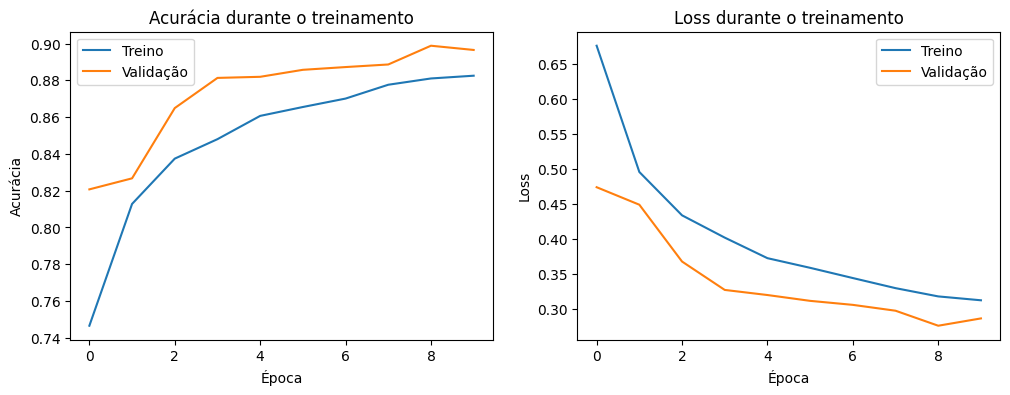

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save("fashion_mnist_cnn_model.keras")


